In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [3]:
# Parameters
img_size = 50
num_images = 10000

# Generate dataset
images = np.zeros((num_images, img_size, img_size, 1), dtype=np.float32)
labels = np.zeros((num_images, 2), dtype=np.float32)

for i in range(num_images):
    x, y = np.random.randint(0, img_size, size=2)
    images[i, x, y, 0] = 255.0
    labels[i] = [x, y]

In [4]:
# Normalize images
images /= 255.0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)  # Output layer for (x, y) coordinates
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\gupte\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 135424)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      17,334,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,353,474 (66.20 MB)

 Trainable params: 17,353,474 (66.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 63s 297ms/step - loss: 237.4609 - mae: 11.4554 - val_loss: 18.3505 - val_mae: 2.4472
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 297ms/step - loss: 13.7053 - mae: 2.0593 - val_loss: 5.8819 - val_mae: 1.7182
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 305ms/step - loss: 3.9039 - mae: 1.3297 - val_loss: 2.9003 - val_mae: 1.0717
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1577s 8s/step - loss: 2.3240 - mae: 0.9808 - val_loss: 1.8463 - val_mae: 0.7862
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - loss: 1.2814 - mae: 0.6886 - val_loss: 1.6607 - val_mae: 0.7928
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 306ms/step - loss: 1.4649 - mae: 0.7732 - val_loss: 1.2135 - val_mae: 0.6299
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 63s 316ms/step - loss: 1.0466 - mae: 0.6442 - val_loss: 1.0846 - val_mae: 0.6164
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - loss: 0.7585 - mae: 0.5684 - val_loss: 1.0359 - val_mae: 0.6303
Epoch 9/10
200/200 ━━━━━━━━━

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.5829 - mae: 0.5097
Test Loss: 0.5888437032699585
Test MAE: 0.511198103427887


In [9]:
# Make predictions
predictions = model.predict(X_test)

# Compare predictions with actual coordinates
for i in range(5):  # Display the first 5 predictions
    print(f"Actual: {y_test[i]}, Predicted: {predictions[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
Actual: [15. 44.], Predicted: [15.151222 45.12898 ]
Actual: [49. 39.], Predicted: [49.34927 39.43478]
Actual: [ 3. 13.], Predicted: [ 3.083548 13.021496]
Actual: [22. 36.], Predicted: [23.025238 35.392822]
Actual: [18. 36.], Predicted: [17.565773 36.84391 ]


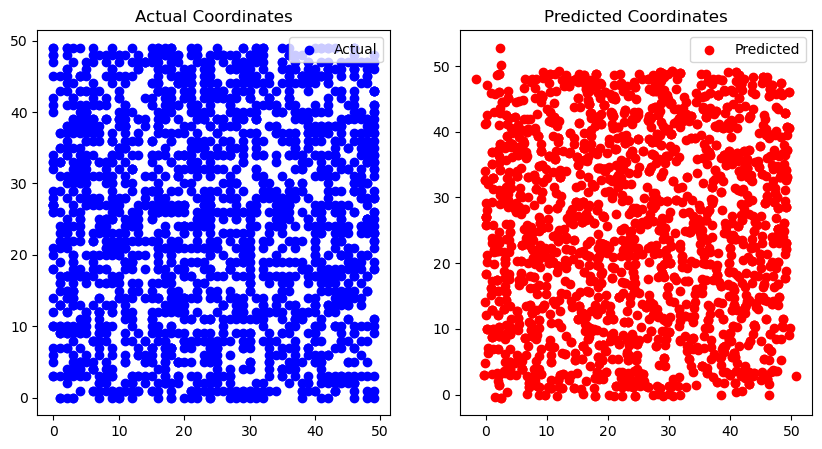

In [11]:
# Plotting ground truth vs predicted coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Actual Coordinates')
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='Actual')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Predicted Coordinates')
plt.scatter(predictions[:, 0], predictions[:, 1], c='red', label='Predicted')
plt.legend()

plt.show()